# Exploring the StarWarsAPI

In [1]:
import json
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
url = 'https://swapi.co/api/{}/{}/'

In [3]:
tabulars = []
for tab in ['people', 'planets', 'starships', 'films', 'species', 'vehicles']:
    entries = []
    stop = 0
    for i in range(1, 100):
        response = requests.get(url.format(tab, i)).text
        data = json.loads(response)
        if 'detail' not in data.keys():
            entries.append(data)
            stop = 0
        else:
            stop += 1
            if stop ==10:
                break
    tabulars.append(entries)

In [4]:
people, planets, ships, films, species, vehicles = [pd.DataFrame(tabulars[i]) for i in range(6)]

In [5]:
people.shape[0]

87

In [6]:
planets.shape[0]

61

In [7]:
ships.shape[0]

37

In [8]:
films.shape[0]

7

In [9]:
species.shape[0]

37

In [10]:
vehicles.shape[0]

39

In [11]:
import matplotlib.pyplot as plt

In [12]:
vehicles['length'] = pd.to_numeric(vehicles['length'], errors='coerce')
vehicles['passengers'] = pd.to_numeric(vehicles['passengers'], errors='coerce')

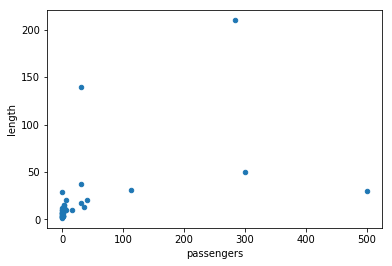

In [13]:
vehicles.plot.scatter('passengers', 'length')
plt.show()

In [14]:
vehicles.columns

Index(['cargo_capacity', 'consumables', 'cost_in_credits', 'created', 'crew',
       'edited', 'films', 'length', 'manufacturer', 'max_atmosphering_speed',
       'model', 'name', 'passengers', 'pilots', 'url', 'vehicle_class'],
      dtype='object')

In [15]:
for column in ['length', 'passengers', 'cargo_capacity', 'cost_in_credits', 'crew', 'max_atmosphering_speed', 'passengers']:
    vehicles[column] = pd.to_numeric(vehicles[column], errors='coerce')

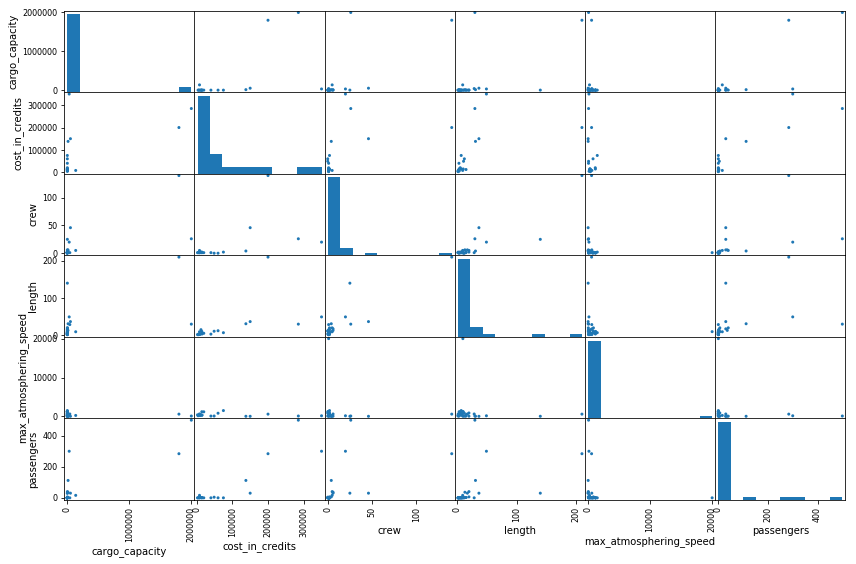

In [16]:
pd.plotting.scatter_matrix(vehicles, figsize=(14, 9), alpha=1)
plt.show()